## Support Vector Machines

Good for classification, regression, linear and non-linear data, outlier detection

In [8]:
!python -m venv test1_downgraded

In [8]:
!pip install "numpy<2.0"

   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/15.8 MB 11.2 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/15.8 MB 10.8 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/15.8 MB 9.9 MB/s eta 0:00:01
   ----------------- ---------------------- 7.1/15.8 MB 8.6 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/15.8 MB 8.0 MB/s eta 0:00:01
   ------------------------- -------------- 10.0/15.8 MB 8.1 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/15.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------- ----- 13.6/15.8 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.8 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 8.1 MB/s eta 0:00:00


In [13]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

### Linear SVC

In [3]:
iris = datasets.load_iris()

X = iris['data'][:, (2,3)] # we're only taking petal length and width for simpler representation 
y = (iris['target'] == 2).astype(np.float64) # Create binary target: 1 if Iris-Virginica, else 0

svm_clf = Pipeline([('scaler', StandardScaler()),('linear_svc', LinearSVC(C=1, loss='hinge'))])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[6.5, 3. ]])

array([1.])

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.patches import Patch

c:\Users\108pa\Parth\Data Science\Classification\test1_downgraded\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\108pa\Parth\Data Science\Classification\test1_downgraded\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


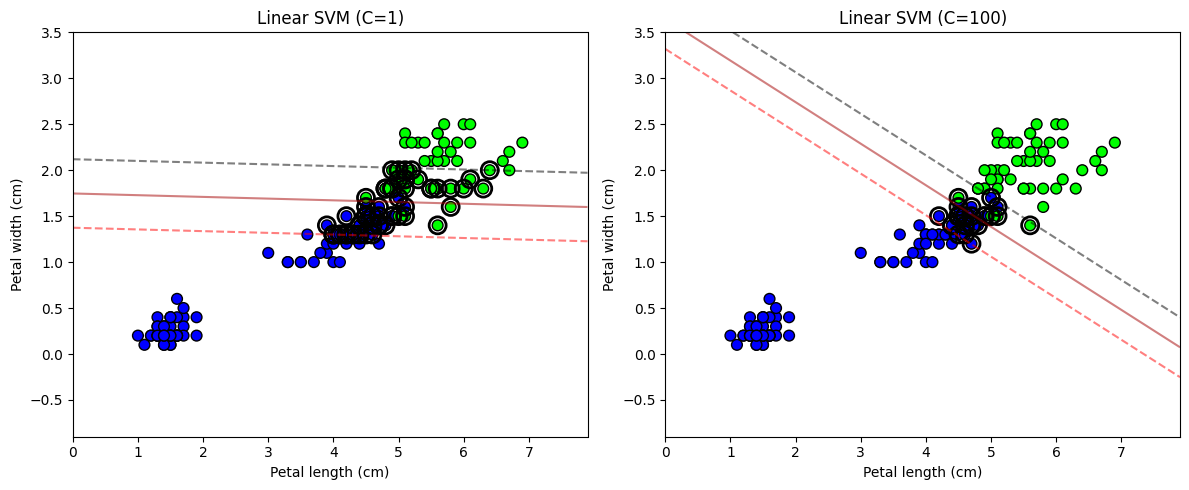

In [6]:
plt.figure(figsize=(12, 5))


for i, C in enumerate([1, 100]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    supportVectorIndices = (np.abs(decision_function) <= 1 + 1e-15).nonzero()[0]
    supportVectors = X[supportVectorIndices]

    ax = plt.subplot(1, 2, i + 1)
    scatter = ax.scatter(
        X[:, 0], X[:, 1], c=y, s=60, cmap="brg", edgecolors="k", label="Samples"
    )

    DecisionBoundaryDisplay.from_estimator(
        clf, X, ax=ax, grid_resolution=100, plot_method="contour",
        levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], cmap="flag"
    )

    ax.scatter(
        supportVectors[:, 0], supportVectors[:, 1],
        s=150, linewidth=2, facecolors="none", edgecolors="k", label="Support Vectors"
    )

    ax.set_xlabel("Petal length (cm)")
    ax.set_ylabel("Petal width (cm)")
    ax.set_title(f"Linear SVM (C={C})")


plt.tight_layout()
plt.show()

### Non-Linear SVC

In [7]:
poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

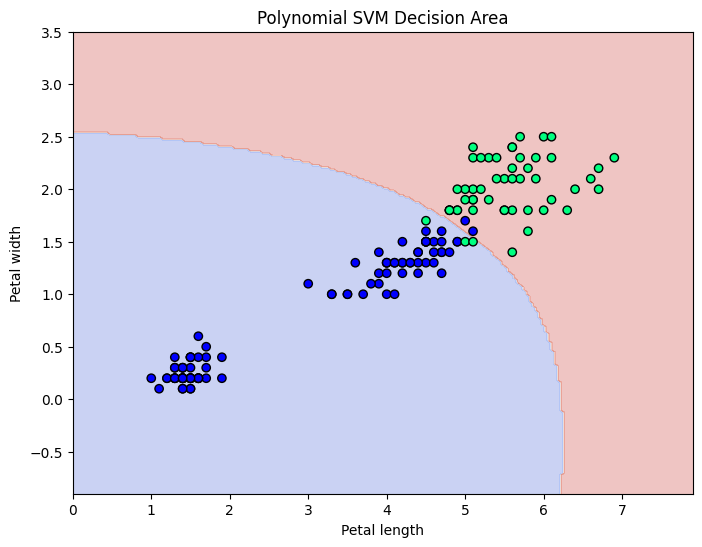

In [8]:
# Plot decision boundary for non-linear polynomial SVM# Plot decision boundary for non-linear polynomial SVM
x0s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
x1s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svm_clf.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(8, 6))
plt.contourf(x0, x1, y_pred, cmap="coolwarm", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", edgecolors="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Polynomial SVM Decision Area")
plt.show()

### Polynomial Kernel

In [9]:
from sklearn.svm import SVC

In [10]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])